In [1]:
from src.dl.inference.inferer import Inferer
import src.dl.lightning as lightning
from src.config import CONFIG

In [2]:
lightning_model = lightning.SegModel.from_experiment(name="norm_pannuke", version="gn_ws_preact")

dataset="pannuke"
w = dataset != "pannuke"

inferer = Inferer(
    lightning_model,
    dataset=dataset,
    patch_size=(256, 256),
    stride_size=80,
    fn_pattern="*",
    data_fold="test",
    model_weights="last",
    apply_weights=w,
    post_proc_method="cellpose",
    batch_size=4,
    num_workers=4,
    model_batch_size=None
)

In [3]:
# lightning_model

In [4]:
inferer.run_inference()

Inference: /home/local/leos/Dippa/datasets/data/pannuke/test/images: 100%|██████████| 681/681 [01:24<00:00,  8.06batch/s, patches=2722/2722]


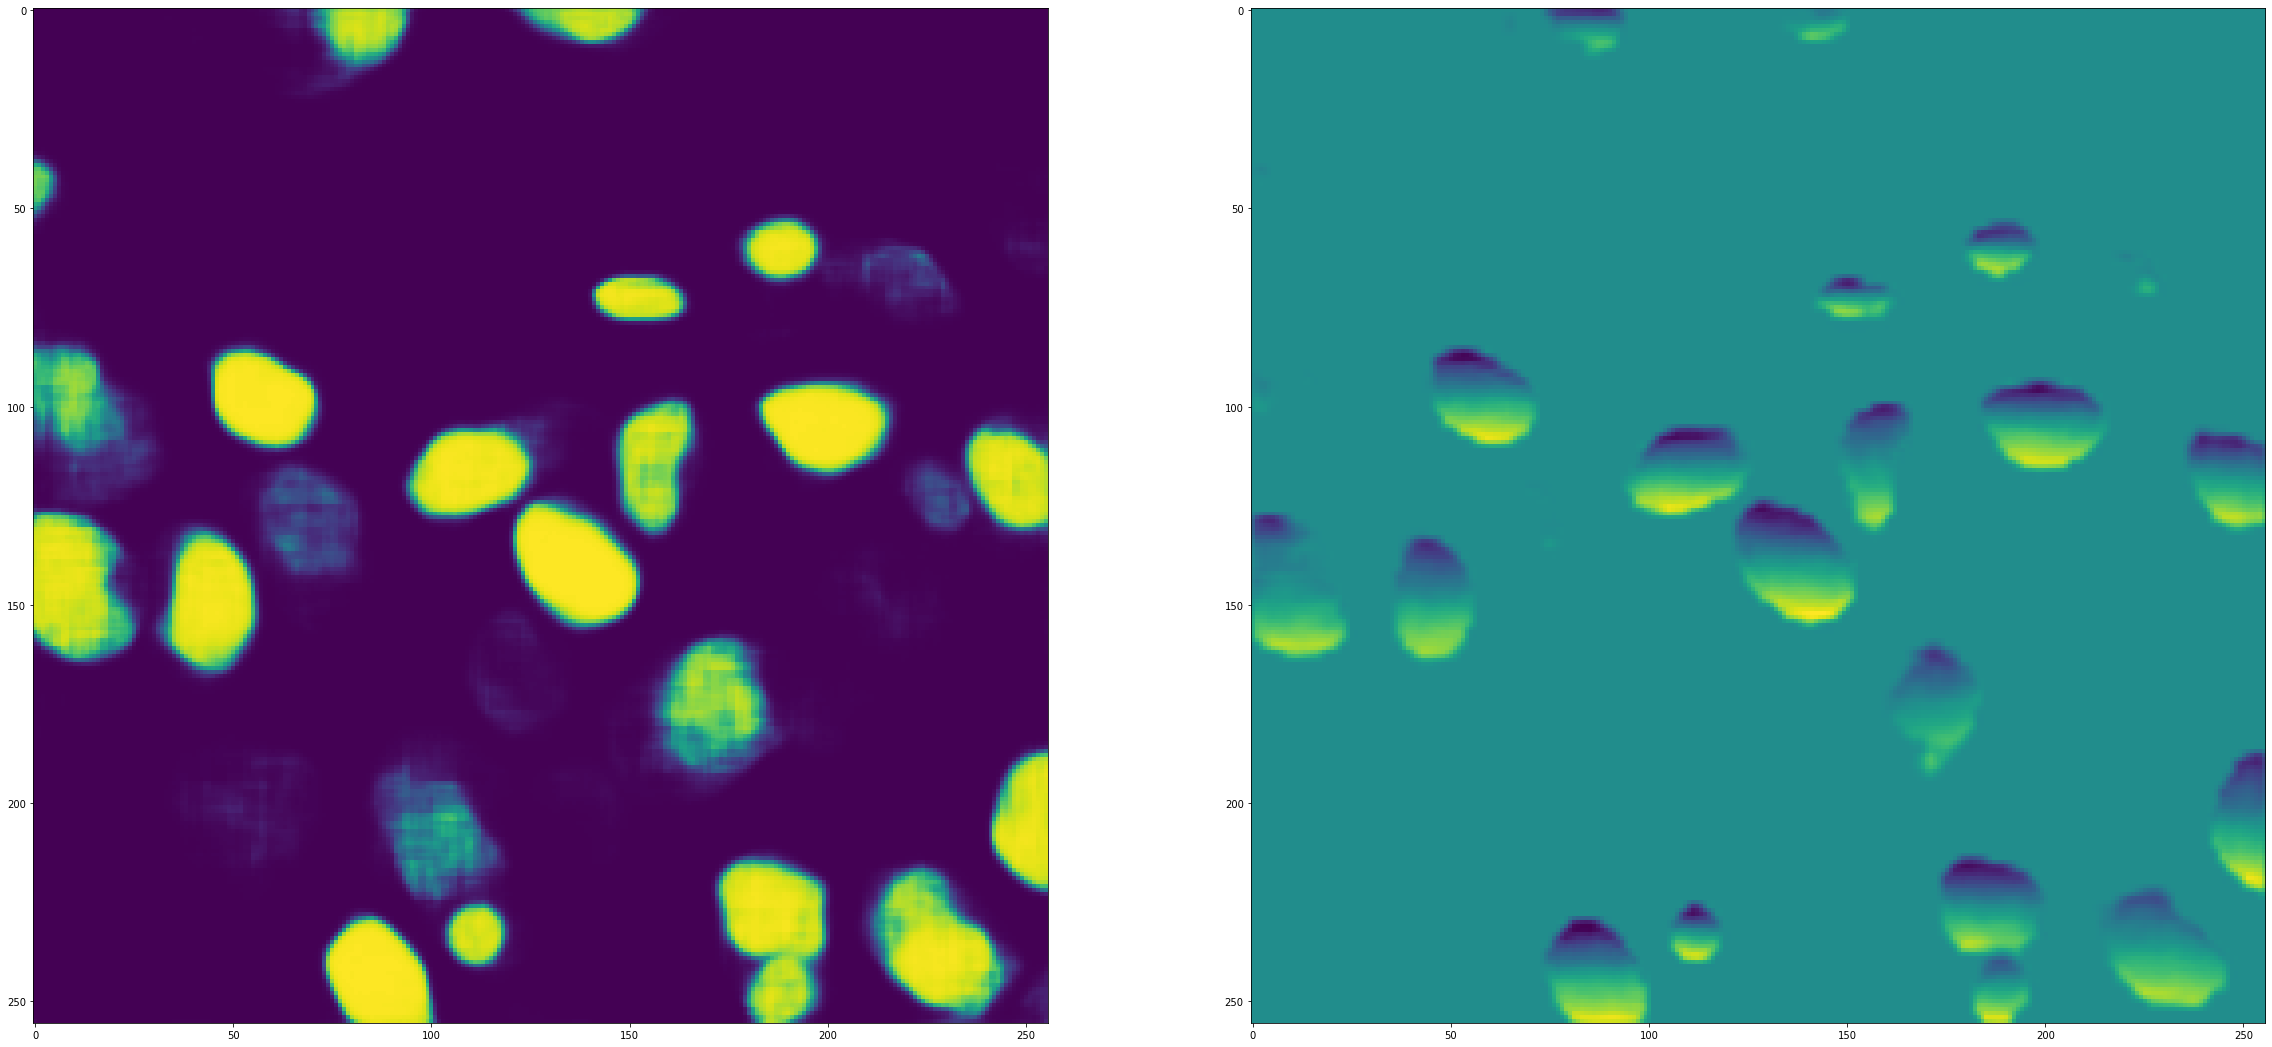

In [5]:
import matplotlib.pyplot as plt 
from skimage.color import label2rgb

key = "Breast_fold3_420"
# key = "test_11"
# key="TCGA-2Z-A9J9-01A-01-TS1"
fig, ax = plt.subplots(1, 2, figsize=(40, 40))
ax[0].imshow(inferer.soft_insts[key][..., 1])
ax[1].imshow(inferer.aux_maps[key][..., 1])
# ax[1].imshow(label2rgb(inferer.inst_maps[key], bg_label=0))

In [6]:
inferer.post_process()

  0%|          | 0/2722 [00:00<?, ?it/s]/home/local/leos/Dippa/DippaEnv/lib/python3.6/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
100%|██████████| 2722/2722 [03:58<00:00, 11.42it/s]


In [7]:
pattern_list = None
binary_scores = inferer.benchmark_insts(pattern_list=pattern_list, file_prefix="bn_ws_postact")
binary_scores

Runnning metrics: 100%|██████████| 2722/2722 [01:10<00:00, 38.37it/s]


,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_recall,inst_precision,splits,merges
name,,,,,,,,,,
Adrenal_gland_fold3_0,0.648577,0.648577,0.771962,0.544219,0.816328,0.666667,0.652174,0.681818,0.185158,0.479768
Adrenal_gland_fold3_1,0.473139,0.477745,0.659498,0.410817,0.794246,0.517241,0.517241,0.517241,0.166980,0.782149
Adrenal_gland_fold3_10,0.516248,0.516248,0.612710,0.492352,0.793233,0.620690,0.600000,0.642857,0.177110,0.795037
Adrenal_gland_fold3_100,0.695886,0.695886,0.924100,0.522135,0.939843,0.555555,0.625000,0.500000,0.115440,0.160176
Adrenal_gland_fold3_101,0.765455,0.765455,0.937417,0.772891,0.869503,0.888889,0.888889,0.888889,0.056115,0.200148
...,...,...,...,...,...,...,...,...,...,...
Uterus_fold3_96,0.652100,0.661328,0.648643,0.550837,0.826255,0.666667,0.681818,0.652174,0.449522,0.555717
Uterus_fold3_97,0.700410,0.717724,0.787682,0.673779,0.825923,0.815789,0.837838,0.794872,0.264677,0.350932
Uterus_fold3_98,0.561971,0.561361,0.623189,0.462901,0.782523,0.591549,0.617647,0.567568,0.455274,0.544845


In [8]:
pattern_list = None
type_scores = inferer.benchmark_types(pattern_list=pattern_list, file_prefix="bcn_ws_postact")
type_scores = type_scores[type_scores.index.str.contains("avg")]
type_scores

Running metrics for epithelial: 100%|██████████| 2722/2722 [00:08<00:00, 314.61it/s]


,AJI,AJI_plus,DICE2,PQ,SQ,DQ,inst_recall,inst_precision,splits,merges
name,,,,,,,,,,
neoplastic_avg_for_the_set,0.285314,0.289045,0.455097,0.230891,0.587043,0.287905,0.305636,0.314345,0.208091,0.845198
inflammatory_avg_for_the_set,0.295987,0.298241,0.584487,0.325200,0.557222,0.389884,0.453438,0.419738,0.104379,0.146375
connective_avg_for_the_set,0.207065,0.207542,0.470190,0.199228,0.458927,0.260278,0.278673,0.310773,0.101512,0.281388
dead_avg_for_the_set,0.019276,0.019276,0.101525,0.026446,0.090008,0.035915,0.031907,0.049638,0.019956,0.206956
epithelial_avg_for_the_set,0.215244,0.220052,0.329745,0.199562,0.375859,0.254417,0.244906,0.305308,0.132890,0.722208


In [9]:
type_scores[type_scores.index.str.contains("for_the")].mean()

AJI               0.204577
AJI_plus          0.206831
DICE2             0.388209
PQ                0.196266
SQ                0.413812
DQ                0.245680
inst_recall       0.262912
inst_precision    0.279960
splits            0.113366
merges            0.440425
dtype: float64

In [ ]:
optimizer = optim.AdaBelief( #has defaults
    m.parameters(),
    lr= 1e-3,
    betas=(0.9, 0.999),
    eps=1e-3,
    weight_decay=0,
    amsgrad=False,
    weight_decouple=False,
    fixed_decay=False,
    rectify=False,
)

optimizer = optim.AdamP(#has defaults
    m.parameters(),
    lr= 1e-3,
    betas=(0.9, 0.999),
    eps=1e-8,
    weight_decay=0,
    delta = 0.1,
    wd_ratio = 0.1
)

optimizer = optim.Apollo(# has defaults
    m.parameters(),
    lr= 1e-2,
    beta=0.9,
    eps=1e-4,
    warmup=0,
    init_lr=0.01,
    weight_decay=0,
)

optimizer = optim.RAdam(# has defaults
    m.parameters(),
    lr= 1e-3,
    betas=(0.9, 0.999),
    eps=1e-8,
    weight_decay=0,
)

optimizer = optim.Ranger(# has defaults
    m.parameters(),
    lr=1e-3,
    alpha=0.5,
    k=6,
    N_sma_threshhold=5,
    betas=(.95, 0.999),
    eps=1e-5,
    weight_decay=0
)